In [57]:
import pandas as pd
import scipy as sp
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
import seaborn as sns
import re
plt.style.use('ggplot')

In [2]:
t10 = pd.read_csv("t102.csv")

In [4]:
made_lst = list(t10.groupby("made").groups.keys())

In [5]:
t10["price"].describe()

count    37985.000000
mean     21360.489114
std      11228.676853
min          1.000000
25%      13954.000000
50%      18997.000000
75%      26995.000000
max      80997.000000
Name: price, dtype: float64

In [6]:
t10.isna().sum()

cty         4370
drive       2125
eng          892
exter          0
fuel           0
hwy         4370
inter       3992
made           0
mileage        0
model          0
price          0
slreview    2929
slrzip       668
title          0
tran         429
year           0
age            0
dtype: int64

In [7]:
def getdf (brand):
    e = t10.loc[t10['made'] == brand][['age', 'mileage', 'price', 'model']]
    e = e[e.groupby("age").price.transform(lambda x: np.abs(x-x.mean())/x.std() < 3)]
    e = e[e.groupby("age").mileage.transform(lambda x: np.abs(x-x.mean())/x.std() < 3)]
    e = pd.get_dummies(e)
    return e

In [55]:
BMW = getdf("BMW")

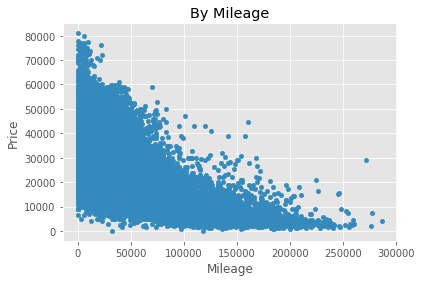

In [65]:
t10.plot.scatter(x = "mileage", y = "price")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("By Mileage")
plt.savefig("plots/bymileage.pdf")

In [162]:
t10half = t10.loc[t10["made"].isin(made_lst[0:5])]
t10half2 = t10.loc[t10["made"].isin(made_lst[5:10])]

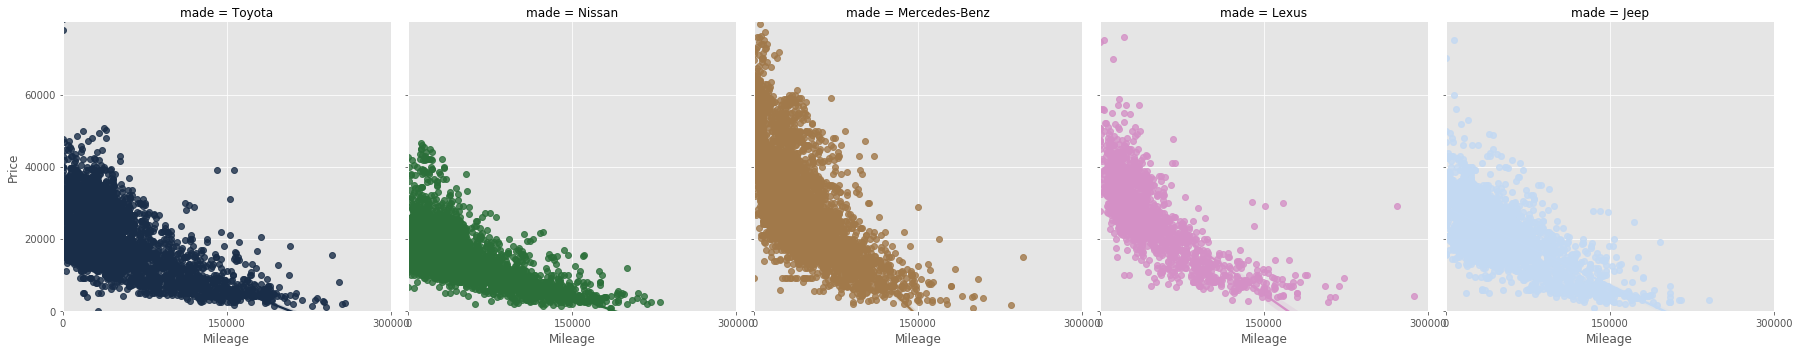

In [169]:
g = sns.lmplot("mileage", "price", t10half2, hue = "made", col = "made", palette = "cubehelix")
g = (g.set_axis_labels("Mileage", "Price").set(xlim=(0, 300000), ylim=(0,80000), xticks=[0,150000,300000], 
                                            yticks=[0,20000,40000,60000]))
g.savefig("plots/bymile2.pdf")

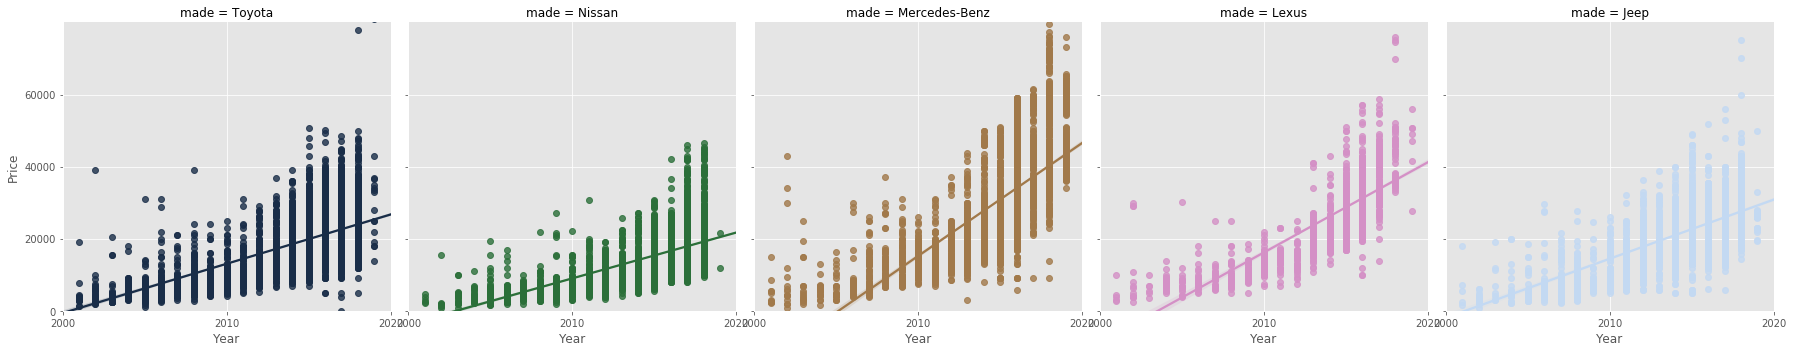

In [173]:
y = sns.lmplot("year", "price", t10half2, hue = "made", col = "made", palette = "cubehelix")
y = (y.set_axis_labels("Year", "Price").set(xlim=(2000,2020), ylim=(0,80000), xticks=[2000,2010,2020], 
                                            yticks=[0,20000,40000,60000]))
y.savefig("plots/byear2.pdf")

In [11]:
def getmodel (brand):
    e = t10.loc[t10['made'] == brand][['age', 'mileage', 'price', 'model']]
    e = e[e.groupby("age").price.transform(lambda x: np.abs(x-x.mean())/x.std() < 3)]
    e = e[e.groupby("age").mileage.transform(lambda x: np.abs(x-x.mean())/x.std() < 3)]
    e = pd.get_dummies(e)
    X = e.drop("price", axis = 1)
    X = X.assign(agesqrt = X.age**2)
    y = e['price']
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    return model.score(X_test, y_test), model.coef_[0] + model.coef_[-1]

In [143]:
def getmodel_wopower (brand):
    e = t10.loc[t10['made'] == brand][['age', 'mileage', 'price', 'model']]
    e = e[e.groupby("age").price.transform(lambda x: np.abs(x-x.mean())/x.std() < 3)]
    e = e[e.groupby("age").mileage.transform(lambda x: np.abs(x-x.mean())/x.std() < 3)]
    e = pd.get_dummies(e)
    X = e.drop("price", axis = 1)
    y = e['price']
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    return model.score(X_test, y_test), model.coef_[0]

In [13]:
getmodel("Toyota")

(0.8078708956525653, -1179.760992051941)

In [14]:
getmodel_woagesqrt("Honda")

(0.808632193039041, -952.576910361234)

In [149]:
lm_dc = {}
for i, e in enumerate(made_lst):
    lm_dc.update({made_lst[i]:[round(n,2) for n in getmodel(e)]})

In [150]:
lmnp_dc = {}
for i, e in enumerate(made_lst):
    lmnp_dc.update({made_lst[i]:[round(n,2) for n in getmodel_wopower(e)]})

In [ ]:
t10["price"].plot.hist()

In [151]:
lm_df = pd.DataFrame.from_dict(lm_dc, orient = 'index', columns = ["R Squrt", "Age's Coefficient"])
lmnp_df = pd.DataFrame.from_dict(lmnp_dc, orient = 'index', columns = ["R Squrt", "Age's Coefficient"])

In [154]:
lm_df.sort_values(by="Age's Coefficient", ascending = False)

,R Squrt,Age's Coefficient
Hyundai,0.74,-476.31
Nissan,0.79,-1143.39
Toyota,0.81,-1179.76
Jeep,0.77,-1445.06
Ford,0.77,-1672.58
Chevrolet,0.83,-1681.44
Honda,0.83,-2123.10
Lexus,0.87,-4675.84
Mercedes-Benz,0.86,-5126.11
BMW,0.88,-5629.91


In [155]:
lmnp_df.sort_values(by="Age's Coefficient", ascending = False)

,R Squrt,Age's Coefficient
Hyundai,0.74,-551.90
Nissan,0.79,-708.47
Toyota,0.81,-852.42
Chevrolet,0.83,-947.44
Honda,0.81,-952.58
Jeep,0.77,-997.52
Ford,0.77,-1053.36
Lexus,0.82,-1671.54
BMW,0.85,-2077.82
Mercedes-Benz,0.83,-2522.12


In [158]:
EDA_df = t10.groupby("made")[["price", "mileage"]].mean().round(2).sort_values(by="price", ascending = False)

In [ ]:
sns.lineplot(x = )